# IPL 2020 Predictions

Indian Premier League (IPL) is a Twenty20 cricket format league in India. It is usually played in April and May every year. As of 2019, the title sponsor of the game is Vivo. The league was founded by Board of Control for Cricket India (BCCI) in 2008.
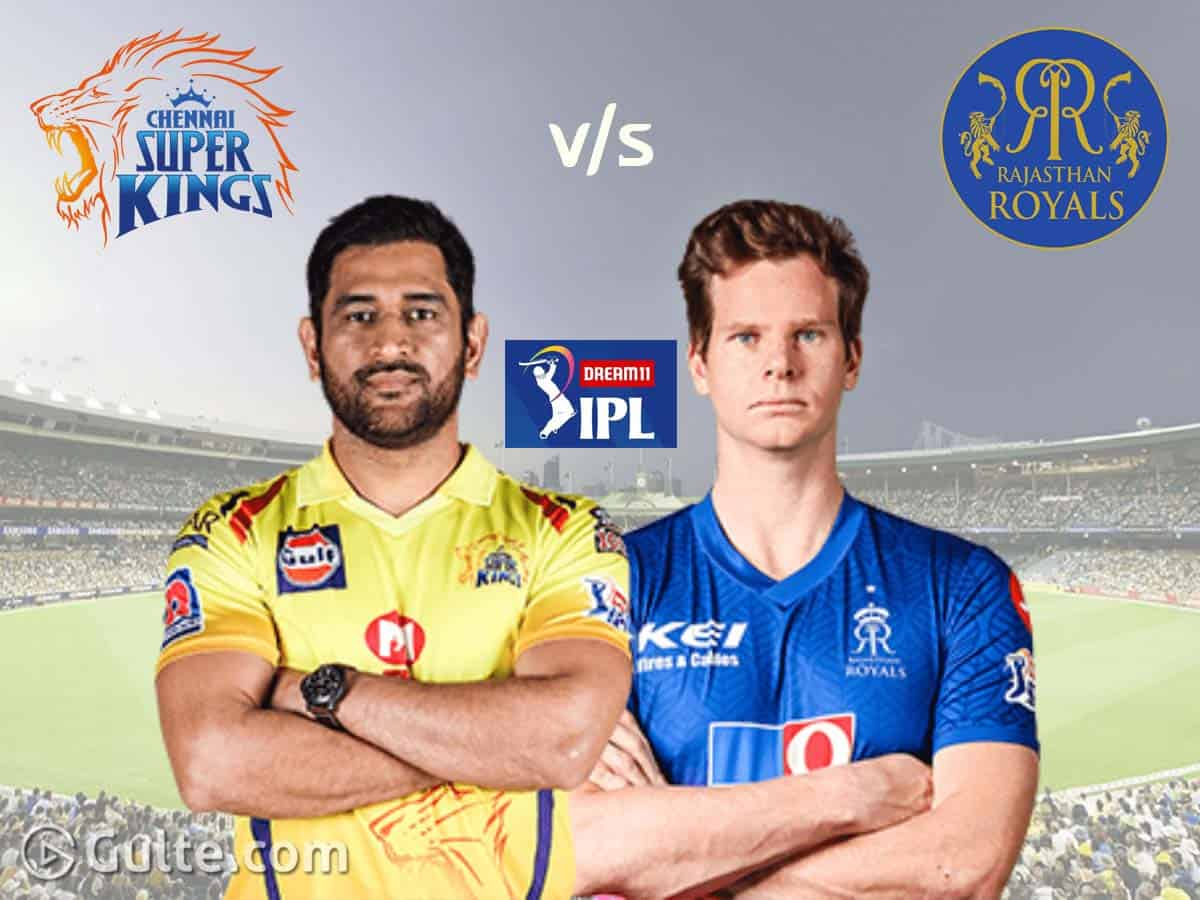

Content: Match between CSK vs RR
Data till Season 11 (2008 - 2019)

matches.csv - Match by match data

deliveries.csv - Ball by ball data


In [140]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set_style('darkgrid')
import warnings
import plotly.graph_objects as go

In [141]:
import os
os.chdir('C:\\Users\\Manisha\\Desktop\\Data')
match=pd.read_csv('C:/Users/Manisha/Desktop/Internship/Widhya_WPL/12_Oct/matches.csv')
score=pd.read_csv('C:/Users/Manisha/Desktop/Internship/Widhya_WPL/12_Oct/deliveries.csv')

In [142]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [143]:
score.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Highest Score Of Batsman 

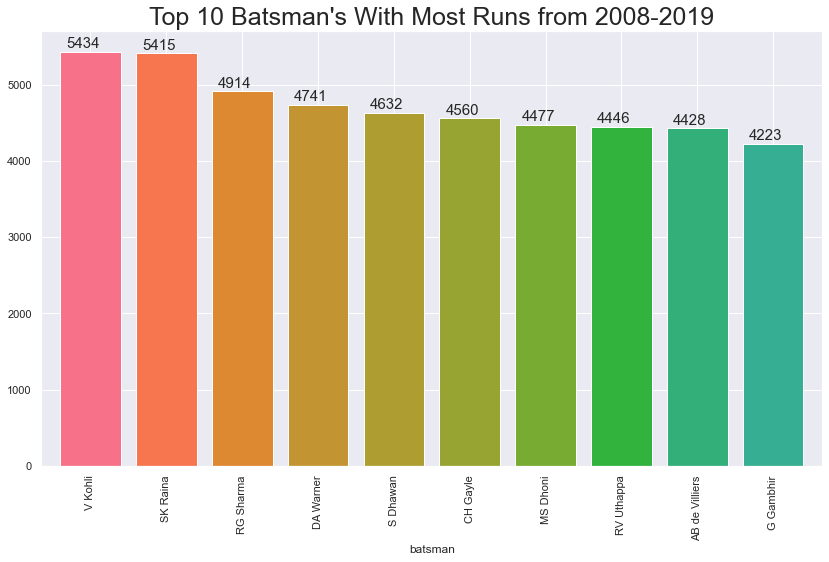

In [144]:
plt.subplots(figsize=(14,8))
b = score.groupby(['batsman'])['batsman_runs'].sum()#.sort_values('batsman_runs')
b = b.sort_values(ascending=False)
b[100:200]

playerstat=b.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('husl',20))
for p in playerstat.patches:
    playerstat.annotate(format(p.get_height()), (p.get_x()+0.08, p.get_height()+50),fontsize=15)
plt.title("Top 10 Batsman's With Most Runs from 2008-2019",fontsize=25)
plt.show()

**Player with Highest Score**

In [145]:
top_scorers = score.groupby(["match_id", "batsman","batting_team","bowling_team"])["batsman_runs"].sum().reset_index()
top_scorers.sort_values('batsman_runs', ascending=0).head(10)
top_scorers.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,bowling_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,Pune Warriors,175
900,60,BB McCullum,Kolkata Knight Riders,Royal Challengers Bangalore,158
8426,562,AB de Villiers,Royal Challengers Bangalore,Mumbai Indians,133
10149,7935,RR Pant,Delhi Daredevils,Sunrisers Hyderabad,130
9257,620,AB de Villiers,Royal Challengers Bangalore,Gujarat Lions,129
5585,372,CH Gayle,Royal Challengers Bangalore,Delhi Daredevils,128
3135,206,M Vijay,Chennai Super Kings,Rajasthan Royals,127
529,36,DA Warner,Sunrisers Hyderabad,Kolkata Knight Riders,126
7752,516,V Sehwag,Kings XI Punjab,Chennai Super Kings,122
10417,7953,SR Watson,Chennai Super Kings,Sunrisers Hyderabad,121


**Players Awarded with Man of the Match**

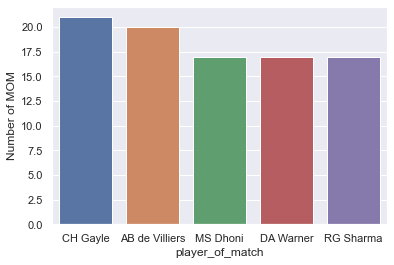

In [146]:
main=match.groupby('player_of_match')['player_of_match'].count()
A=pd.DataFrame(main)
A.rename(columns={'player_of_match':'Number of MOM'},inplace=True)
A.sort_values("Number of MOM",inplace=True,ascending=False)
A=A.reset_index()
A=A.iloc[:5,:]
sns.barplot(A['player_of_match'] ,A['Number of MOM'])

# Team with Maximum Win

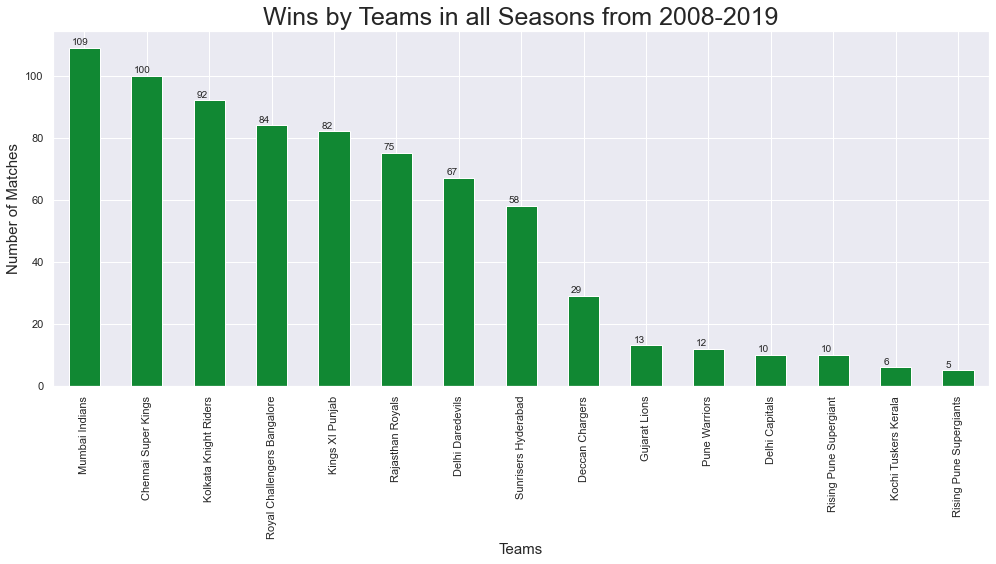

In [147]:
plt.figure(figsize=(14,8))
mat=match.winner.value_counts().plot(kind='bar', color='#183')
for p in mat.patches:
    mat.annotate(format(p.get_height()), (p.get_x()+0.05, p.get_height()+1),fontsize=10)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Number of Matches',fontsize=15)
plt.title('Wins by Teams in all Seasons from 2008-2019', size=25)
plt.tight_layout()

**Team with 200+ Score**

In [148]:
high_scores=score.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores=high_scores[high_scores['total_runs']>=200]
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1370,7937,1,Kolkata Knight Riders,Kings XI Punjab,250
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
1426,11147,1,Sunrisers Hyderabad,Royal Challengers Bangalore,233
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
1500,11339,1,Sunrisers Hyderabad,Kings XI Punjab,232


# CSK vs RR

In [149]:
csk_rr=mtodayteam=match[np.logical_or(np.logical_and(match['team1']=='Chennai Super Kings',
                                                       match['team2']=='Rajasthan Royals'),
                                        np.logical_and(match['team2']=='Chennai Super Kings',
                                                       match['team1']=='Rajasthan Royals'))]

In [150]:
name= csk_rr.winner.value_counts().index
value=csk_rr.winner.value_counts().values
px.pie(names=name,values=value)

In [151]:
 print("There are",csk_rr.shape[0],"number of matches played between CSK and RR")  

There are 21 number of matches played between CSK and RR


In [152]:
 td=score[np.logical_or(np.logical_and(score['batting_team']=='Rajasthan Royals',
                                                  score['bowling_team']=='Chennai Super Kings'),
                                   np.logical_and(score['bowling_team']=='Rajasthan Royals',
                                                  score['batting_team']=='Chennai Super Kings'))]

In [153]:
td.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
19341,83,1,Chennai Super Kings,Rajasthan Royals,1,1,PA Patel,SP Fleming,Sohail Tanvir,0,...,0,0,0,0,0,0,0,PA Patel,lbw,NaN
19342,83,1,Chennai Super Kings,Rajasthan Royals,1,2,S Vidyut,SP Fleming,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
19343,83,1,Chennai Super Kings,Rajasthan Royals,1,3,S Vidyut,SP Fleming,Sohail Tanvir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
19344,83,1,Chennai Super Kings,Rajasthan Royals,1,4,SP Fleming,S Vidyut,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
19345,83,1,Chennai Super Kings,Rajasthan Royals,1,5,SP Fleming,S Vidyut,Sohail Tanvir,0,...,0,0,0,0,0,0,0,SP Fleming,lbw,NaN


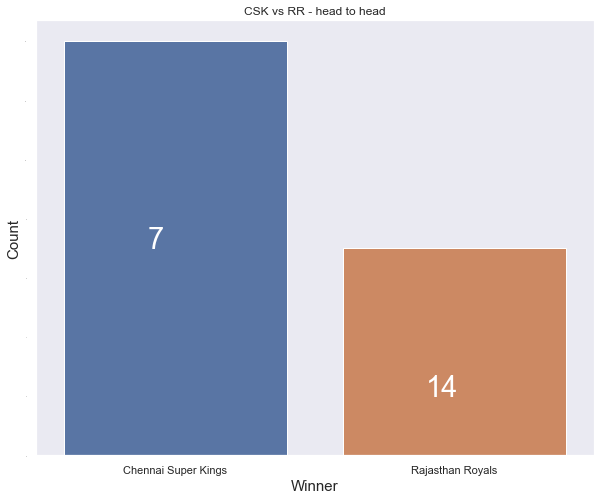

In [154]:
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(csk_rr['winner'],order=csk_rr['winner'].value_counts().index)
plt.text(-0.1,7,str(csk_rr['winner'].value_counts()['Rajasthan Royals']),size=29,color='white')
plt.text(0.9,2,str(csk_rr['winner'].value_counts()['Chennai Super Kings']),size=29,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=0)
plt.title('CSK vs RR - head to head')
plt.show()

**Best performance- CSK vs RR**

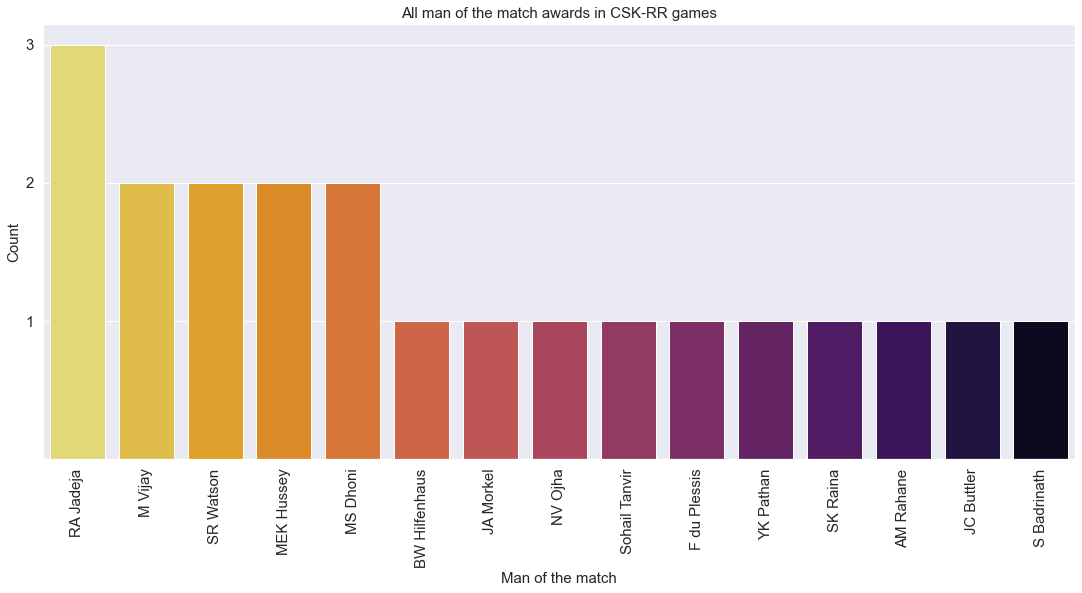

In [155]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(csk_rr['player_of_match'],order=csk_rr['player_of_match'].value_counts().index,palette='inferno_r')
plt.title('All man of the match awards in CSK-RR games',fontsize=15)
plt.yticks([1,2,3],[1,2,3],fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Man of the match',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

**Toss Winner Of the Match**

Text(0.5, 1.0, 'Most number of toss won\n')

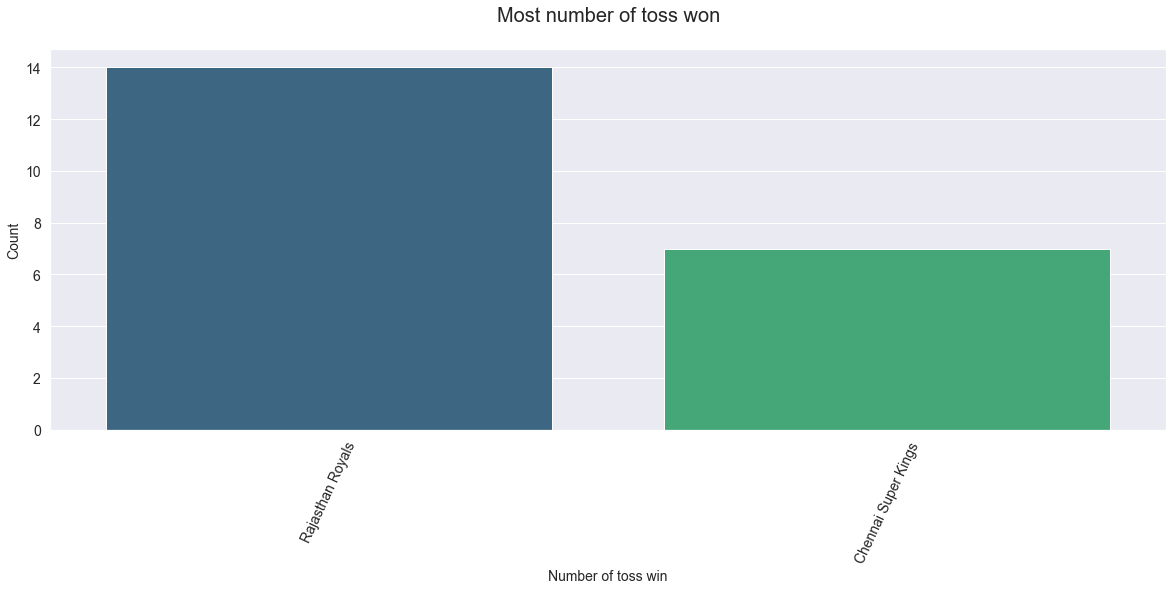

In [156]:
plt.figure(figsize=(20,7))
sns.countplot(csk_rr['toss_winner'],order=csk_rr['toss_winner'].value_counts().index, palette='viridis')
plt.xticks(rotation=65,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of toss win',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title("Most number of toss won\n",fontsize=20)

**Decision upon winning the toss by both teams**

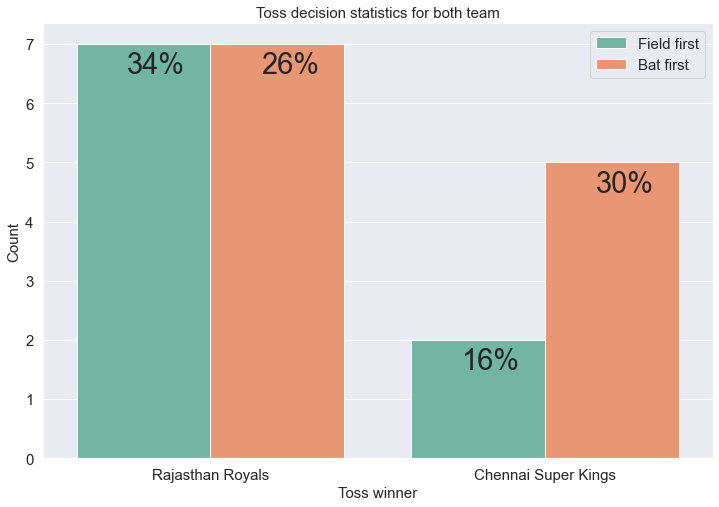

In [157]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(12,8)
sns.countplot(csk_rr['toss_winner'],order=csk_rr['toss_winner'].value_counts().index,palette='Set2',hue=match['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.text(-0.25,6.5,str(int((5/15)*100)+1)+'%',fontsize=29)
plt.text(0.15,6.5,str(int((4/15)*100))+'%',fontsize=29)
plt.text(0.75,1.5,str(int((2/13)*100)+1)+'%',fontsize=29)
plt.text(1.15,4.5,str(int((4/13)*100))+'%',fontsize=29)
plt.legend(['Field first','Bat first'],loc='best',fontsize=15)
plt.show()

RR bat first by 34%
CSK bowl first by 30%

**Correlation Matrix**

In [158]:
csk_rr.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.815703,NaN,0.090420,-0.184884
season,0.815703,1.000000,NaN,0.021906,-0.096635
dl_applied,NaN,NaN,NaN,NaN,NaN
win_by_runs,0.090420,0.021906,NaN,1.000000,-0.620800
win_by_wickets,-0.184884,-0.096635,NaN,-0.620800,1.000000


**HeatMap**

Text(0.5, 1.0, "Spearman's correlation of parameters\n")

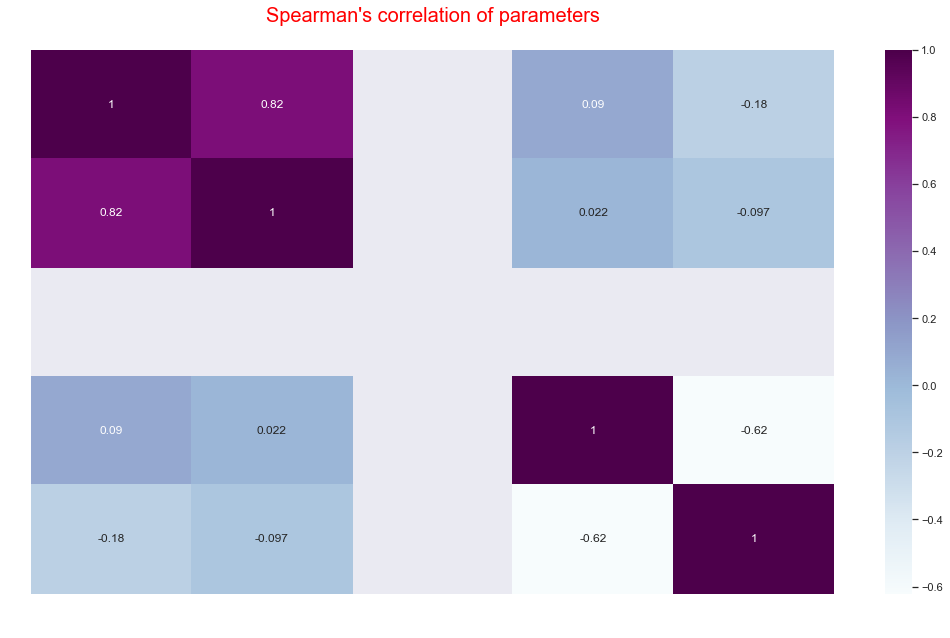

In [159]:
plt.figure(figsize=(18,10))
sns.heatmap(csk_rr.corr(),annot=True,cmap='BuPu')
plt.xticks(color='white',fontsize=14)
plt.yticks(color='white',fontsize=14)
plt.title("Spearman's correlation of parameters\n",fontsize=20,color='red')

**Matches Played In Most Cities**

Text(0.5, 1.0, 'Most played cities\n')

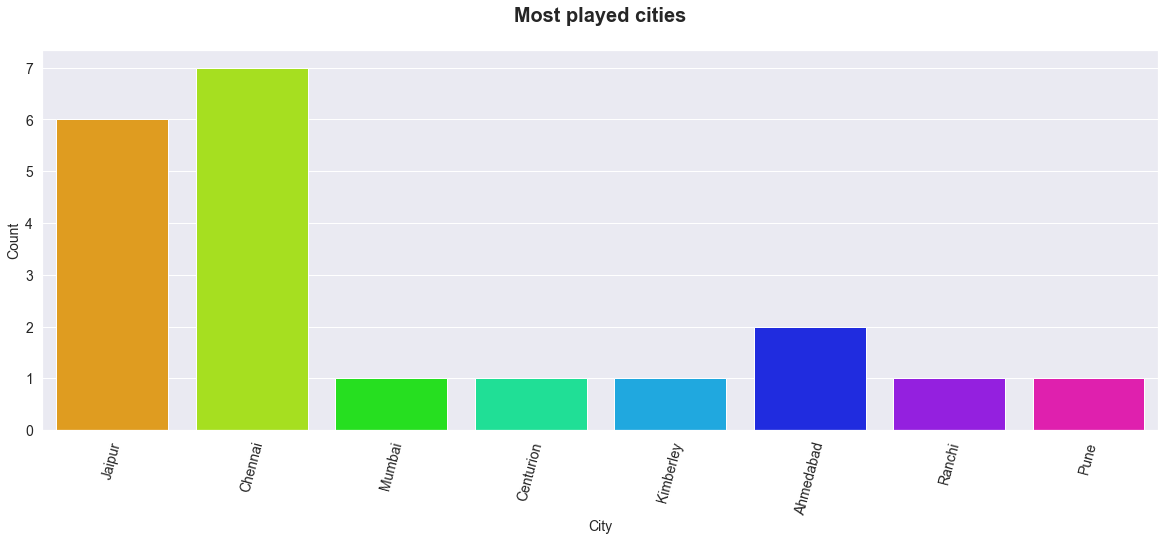

In [160]:
plt.figure(figsize=(20,7))
sns.countplot(csk_rr['city'],palette='hsv')
plt.xticks(rotation=75,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('City',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title("Most played cities\n",fontsize=20,fontweight='bold')

**Matches in Season**

Text(0.5, 1.0, 'Seasons with maximum matches\n')

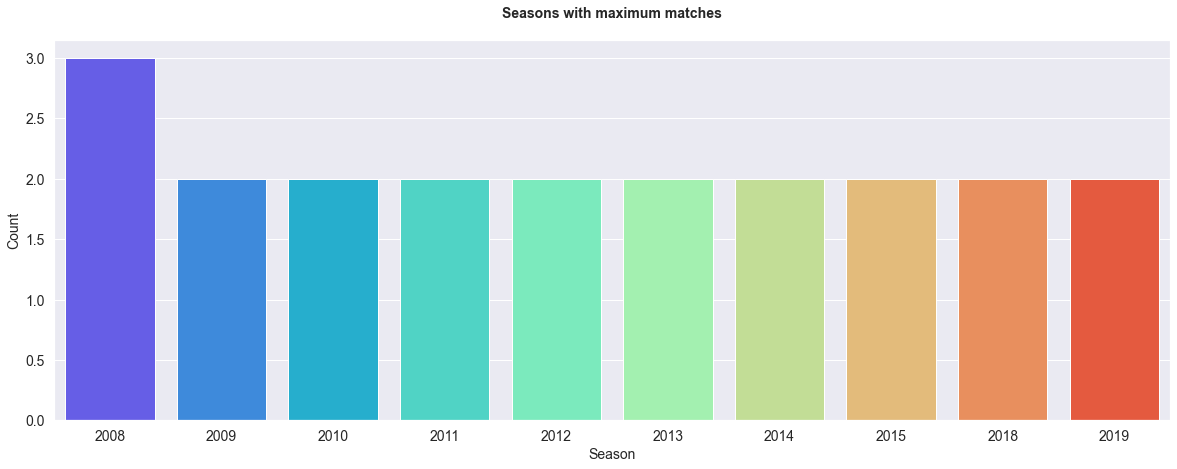

In [161]:
plt.figure(figsize=(20,7))
sns.countplot(csk_rr['season'],palette='rainbow')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Seasons with maximum matches\n',fontsize=14,fontweight='bold')

**Most Winners**

Text(0.5, 1.0, 'Most number of winners\n')

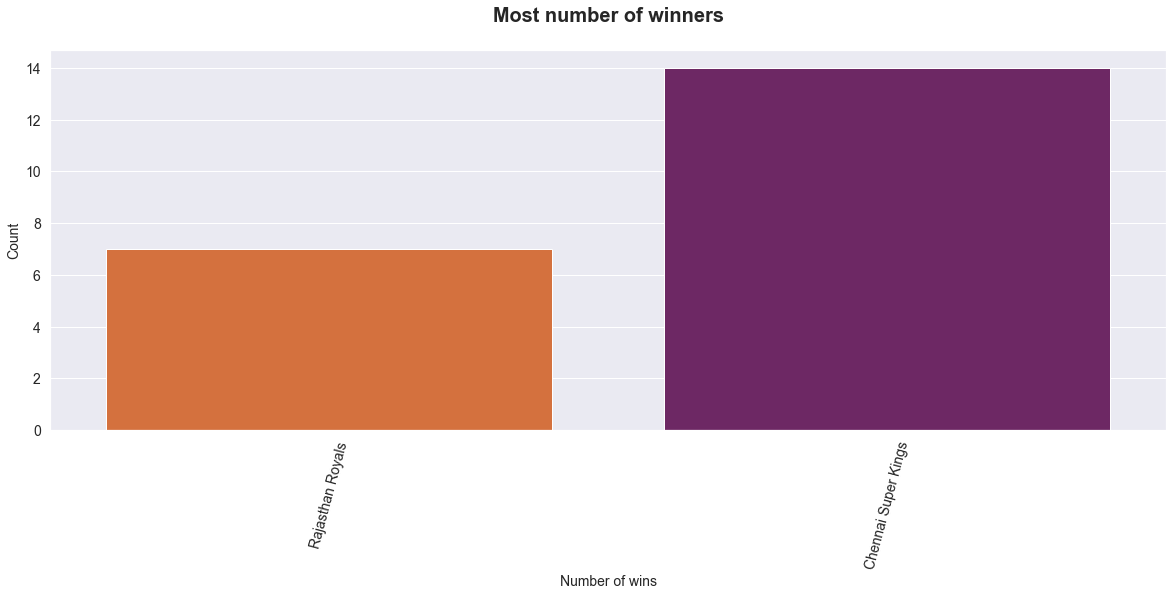

In [162]:
plt.figure(figsize=(20,7))
sns.countplot(csk_rr['winner'],palette='inferno_r')
plt.xticks(rotation=75,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of wins',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title("Most number of winners\n",fontsize=20,fontweight='bold')

**Displaying top 10 run scorers**

In [163]:
csk_rr.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
82,83,2008,Jaipur,2008-05-04,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash,NaN
109,110,2008,Chennai,2008-05-24,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Rajasthan Royals,10,0,JA Morkel,"MA Chidambaram Stadium, Chepauk",DJ Harper,SL Shastri,NaN
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
136,137,2009,Centurion,2009-04-30,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,38,0,SK Raina,SuperSport Park,GAV Baxter,RE Koertzen,NaN
151,152,2009,Kimberley,2009-05-09,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Chennai Super Kings,0,7,S Badrinath,De Beers Diamond Oval,GAV Baxter,HDPK Dharmasena,NaN


In [164]:
csk_rr.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21.0,2070.380952,3806.862546,83.0,198.0,361.0,533.0,11316.0
season,21.0,2012.666667,3.637765,2008.0,2010.0,2012.0,2015.0,2019.0
dl_applied,21.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
win_by_runs,21.0,11.523810,19.868616,0.0,0.0,0.0,12.0,64.0
win_by_wickets,21.0,3.238095,3.176551,0.0,0.0,4.0,5.0,8.0


**Batsmen aggregates (Runs, Balls, 4s, 6s, SR)**

In [165]:
batsman_grp = score.groupby(["match_id", "inning", "batting_team", "bowling_team", "batsman"])
batsmen = batsman_grp["batsman_runs"].sum().reset_index()

# Ignore the wide balls.
balls_faced = score[score["wide_runs"] == 0]
balls_faced = balls_faced.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
balls_faced.columns = ["match_id", "inning", "batsman", "balls_faced"]
batsmen = batsmen.merge(balls_faced, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

fours = score[ score["batsman_runs"] == 4]
sixes = score[ score["batsman_runs"] == 6]

fours_per_batsman = fours.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_per_batsman = sixes.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()

fours_per_batsman.columns = ["match_id", "inning", "batsman", "4s"]
sixes_per_batsman.columns = ["match_id", "inning", "batsman", "6s"]

batsmen = batsmen.merge(fours_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen = batsmen.merge(sixes_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen['SR'] = np.round(batsmen['batsman_runs'] / batsmen['balls_faced'] * 100, 2)

for col in ["batsman_runs", "4s", "6s", "balls_faced", "SR"]:
    batsmen[col] = batsmen[col].fillna(0)

dismissals = score[ pd.notnull(score["player_dismissed"])]
dismissals = dismissals[["match_id", "inning", "player_dismissed", "dismissal_kind", "fielder"]]
dismissals.rename(columns={"player_dismissed": "batsman"}, inplace=True)
batsmen = batsmen.merge(dismissals, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

batsmen = csk_rr[['id','season']].merge(batsmen, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
batsmen

,season,match_id,inning,batting_team,bowling_team,batsman,batsman_runs,balls_faced,4s,6s,SR,dismissal_kind,fielder
0,2008,83,1,Chennai Super Kings,Rajasthan Royals,JA Morkel,42,33.0,4.0,1.0,127.27,bowled,NaN
1,2008,83,1,Chennai Super Kings,Rajasthan Royals,Joginder Sharma,0,1.0,0.0,0.0,0.00,caught,Sohail Tanvir
2,2008,83,1,Chennai Super Kings,Rajasthan Royals,M Muralitharan,0,3.0,0.0,0.0,0.00,bowled,NaN
3,2008,83,1,Chennai Super Kings,Rajasthan Royals,M Ntini,11,12.0,2.0,0.0,91.67,bowled,NaN
4,2008,83,1,Chennai Super Kings,Rajasthan Royals,MS Dhoni,1,7.0,0.0,0.0,14.29,caught,GC Smith
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2019,11316,2,Chennai Super Kings,Rajasthan Royals,M Santner,11,3.0,0.0,1.0,366.67,NaN,NaN
307,2019,11316,2,Chennai Super Kings,Rajasthan Royals,MS Dhoni,60,43.0,2.0,3.0,139.53,bowled,NaN
308,2019,11316,2,Chennai Super Kings,Rajasthan Royals,RA Jadeja,11,4.0,0.0,1.0,275.00,NaN,NaN
309,2019,11316,2,Chennai Super Kings,Rajasthan Royals,SK Raina,4,4.0,1.0,0.0,100.00,run out,J Archer


**Bowler Aggregates**

In [166]:
bowler_grp = score.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])
bowlers = bowler_grp["total_runs", "wide_runs", "bye_runs", "legbye_runs", "noball_runs"].sum().reset_index()

bowlers["runs"] = bowlers["total_runs"] - (bowlers["bye_runs"] + bowlers["legbye_runs"])
bowlers["extras"] = bowlers["wide_runs"] + bowlers["noball_runs"]

del( bowlers["bye_runs"])
del( bowlers["legbye_runs"])
del( bowlers["total_runs"])

dismissal_kinds_for_bowler = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
dismissals = score[score["dismissal_kind"].isin(dismissal_kinds_for_bowler)]
dismissals = dismissals.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])["dismissal_kind"].count().reset_index()
dismissals.rename(columns={"dismissal_kind": "wickets"}, inplace=True)

bowlers = bowlers.merge(dismissals, left_on=["match_id", "inning", "bowling_team", "bowler", "over"], 
                        right_on=["match_id", "inning", "bowling_team", "bowler", "over"], how="left")
bowlers["wickets"] = bowlers["wickets"].fillna(0)

bowlers_over = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler'])['over'].count().reset_index()
bowlers = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler']).sum().reset_index().drop('over', 1)
bowlers = bowlers_over.merge(bowlers, on=["match_id", "inning", "bowling_team", "bowler"], how = 'left')
bowlers['Econ'] = np.round(bowlers['runs'] / bowlers['over'] , 2)
bowlers = csk_rr[['id','season']].merge(bowlers, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

bowlers

<ipython-input-166-6cf29f98feb9>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,season,match_id,inning,bowling_team,bowler,over,wide_runs,noball_runs,runs,extras,wickets,Econ
0,2008,83,1,Rajasthan Royals,MM Patel,4,0,0,16,0,2.0,4.00
1,2008,83,1,Rajasthan Royals,SK Trivedi,2,0,0,17,0,0.0,8.50
2,2008,83,1,Rajasthan Royals,SK Warne,3,0,0,29,0,1.0,9.67
3,2008,83,1,Rajasthan Royals,SR Watson,4,2,0,19,2,1.0,4.75
4,2008,83,1,Rajasthan Royals,Sohail Tanvir,4,0,0,14,0,6.0,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
249,2019,11316,2,Rajasthan Royals,DS Kulkarni,3,0,0,14,0,1.0,4.67
250,2019,11316,2,Rajasthan Royals,J Archer,4,0,0,23,0,1.0,5.75
251,2019,11316,2,Rajasthan Royals,JD Unadkat,3,0,0,23,0,1.0,7.67
252,2019,11316,2,Rajasthan Royals,R Parag,3,0,0,24,0,0.0,8.00


**Average Run**

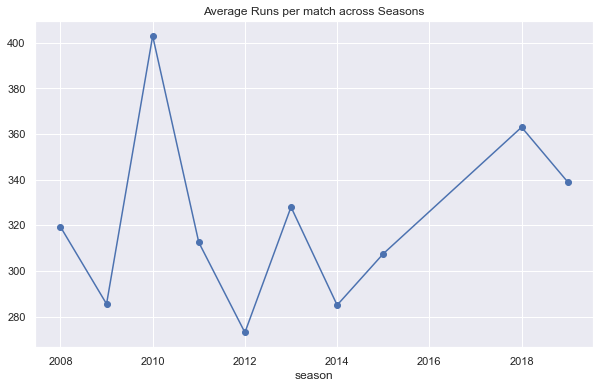

In [167]:
import matplotlib.pyplot as mlt
batsmen = csk_rr[['id','season']].merge(score, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
avgruns_each_season=csk_rr.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Average Runs per match across Seasons')
mlt.show()

**Sixes and Fours Across Season**

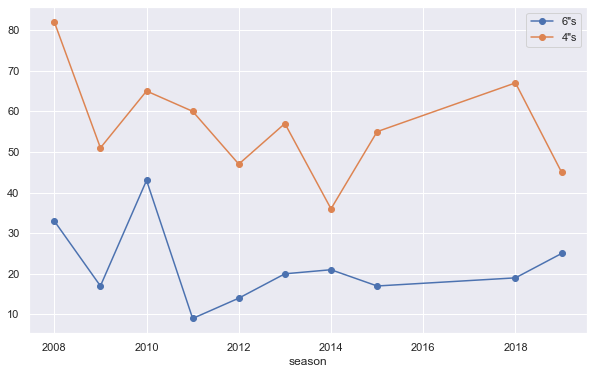

In [168]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()

**TOP 10 Batsmen**

In [169]:
top_scores = score.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,175
900,60,BB McCullum,Kolkata Knight Riders,158
8426,562,AB de Villiers,Royal Challengers Bangalore,133
10149,7935,RR Pant,Delhi Daredevils,130
9257,620,AB de Villiers,Royal Challengers Bangalore,129
5585,372,CH Gayle,Royal Challengers Bangalore,128
3135,206,M Vijay,Chennai Super Kings,127
529,36,DA Warner,Sunrisers Hyderabad,126
7752,516,V Sehwag,Kings XI Punjab,122
10417,7953,SR Watson,Chennai Super Kings,121


The Jamaican leads the table. Not only Gayle but there are many RCB players on the top scores list that indicates RCB is a very formidable batting side.

**Run Scored in First 6 Overs**

In [170]:
runs = score.groupby('match_id')['total_runs'].sum()

run = list(runs)

def sum_of_runs(l):
  total = 0
  for val in l:
    total = total + val
  return total

my_list = run
print ("The sum of runs scored in powerplay in 21 matches is", sum_of_runs(my_list))

The sum of runs scored in powerplay in 21 matches is 235290


In [171]:
matchesplayed = csk_rr.shape[0]
matchesplayed

21

In [172]:
RS = sum_of_runs(my_list)/matchesplayed
RS

11204.285714285714

In [173]:
print("The average powerplay score for Rajasthan Royals is", RS)

The average powerplay score for Rajasthan Royals is 11204.285714285714


# Deepak Chahar's Economy Rate

In [174]:
deepak =td[td.bowler=='DL Chahar']

oversbowled = deepak.groupby('match_id')['over'].value_counts()
oversbowled

match_id  over
7910      1       8
          7       8
          3       6
          5       6
11148     5       7
          1       6
          3       6
          7       6
11316     1       6
          3       6
          5       6
          19      6
Name: over, dtype: int64

In [175]:
over_bowled=list(oversbowled)
over_bowled

overs = len(over_bowled)

In [176]:
rc= deepak['total_runs'].sum()
rc

89

In [177]:
EconomyRate= rc/overs

In [178]:
print("DL Chahal's economy rate is",EconomyRate)

DL Chahal's economy rate is 7.416666666666667


# Jofra Archer wicket's

In [179]:
JF= td[td.bowler=='J Archer']
wickets_in_death = JF.groupby(['match_id','over'])['player_dismissed'].nunique()

In [180]:
wickets_in_death

match_id  over
7936      3       1
          12      1
          17      0
          19      0
11148     2       1
          6       0
          17      0
          19      1
11316     6       1
          12      0
          17      0
          19      0
Name: player_dismissed, dtype: int64

# Steve Smith's Strike Rate

In [181]:
SS= td[td.batsman=='SPD Smith']
runs_scored = SS['total_runs'].sum()
runs_scored

88

In [182]:
balls_played =SS['ball'].value_counts()
balls_played

3    18
1    17
6    16
4    15
2    14
5    13
7     2
8     1
Name: ball, dtype: int64

In [183]:
SB =list(balls_played)
SB

[18, 17, 16, 15, 14, 13, 2, 1]

In [184]:
def sum_of_list(l):
  total = 0
  for val in l:
    total = total + val
  return total

my_list = SB
print ("The sum of balls faced is", sum_of_list(my_list))

The sum of balls faced is 96


In [185]:
StrikeRate=(runs_scored*100)/sum_of_list(my_list)

In [186]:
print("Strike Rate of SPD Smith against CSK is",StrikeRate)

Strike Rate of SPD Smith against CSK is 91.66666666666667


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ _ _ _ _ _ _  __ _ 
_  _ _ _ _ _ __ _ _ _ _ _  _ _ _  _ _  _ _ _ _ _ _ _ _   __ _ _ _ _ _ _ _____ _ ____   _ ___  __ _ _ _  __ _ _ _ _ _ _ _ _ 

#                                                   CONCLUSION            

From the overall Data we observed that **CSK** has won most of the matches as compared to **RR**, that is easily visible by seeing the:

    1. Toss result
    
    2. Winner on the basis of Toss Winning
    
    3. Pie Chart of overall details
    
    4. Winners of most season


The average Run score by RR in the first 6 overs is: **between (40-49)**

**Deepak Chahar's** economy rate is: **7.416666666666667**

**Jofra Archer** wickets by death is: **0**

**Smith Steve** strike rate is : **91.66666666666667**